### 데이터 불러오기

In [1]:
#라이브러리 불러오기
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
iris = datasets.load_iris()
features = iris.data

# 데이터프레임 생성
species = pd.DataFrame(iris.target)
species.columns = ['Species']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
data = pd.concat([data, species],axis=1) 
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터 탐색

#### ※주의점※
주피터 노트북(또는 Colab)에선 가장 하단에 있는 코드의 실행결과만 출력하므로,
여러 코드의 실행결과를 같이 확인하고자 한다면 print()등의 함수를 활용하는것이 좋다.

In [2]:
print(data.shape) # 데이터의 행과 열의 크기를 제공한다.
data.describe() # 데이터에 대한 기초통계략 요약표를 제공한다.

(150, 5)


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### ※Subplot?
한 창에 여러개의 그래프를 nxn의 방식으로 함께 보여주도록 한다.

subplot(nrows, ncols, index)의 형식.

nrow = n x n에서 첫번째 n. subplot의 행의 수

ncol = n x n에서 두번째 n. subplot의 열의 수              

index = graph의 주소. 1부터 시작하며 위부터 아래로, 왼쪽에서 오른쪽으로 순서를 매긴다. 

ex) subplot(2,2,3) = 2x2 4개의 graph중 세 번째

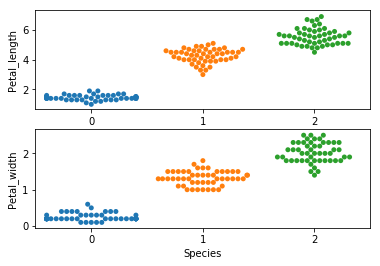

In [3]:
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# 해당 브라우저 내부에 바로 그래프가 그려지도록 한다.
%matplotlib inline 

ax1 = plt.subplot(211) # 2x1 plot 공간중 첫번째 그림(위쪽)
swarm1 = sns.swarmplot(x=data['Species'], y=data['Petal_length'])
plt.xlabel('Species')
plt.ylabel('Petal_length')

ax2 = plt.subplot(212) # 2x1 plot 공간중 둘째 그림(아래쪽)
swarm2 = sns.swarmplot(x=data['Species'], y=data['Petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal_width')
plt.show() # ax1과 ax2 모두를 보여준다.

### SVM 모델 생성
SVM도 데이터 크기에 민감하기 때문에 스케일링 과정을 거치는것이 좋다.

In [276]:
# 데이터 스케일링
X = data.iloc[:,[2,3]] # data의 모든 행(:)에 대하여 2,3열만 할당(꽃잎 길이,너비)
y = data['Species'] 
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X) #y는 범주형 예측 변수(0,1,2)이므로 scaling하진 않는다.

### Train and Test 자료 분리

모델(알고리즘)의 성능을 파악하고자 한다면, 
우선 훈련용 자료(train)와 성능 측정용 자료(test)를 분리해야 한다.

In [157]:
from sklearn.model_selection import train_test_split

# shuffle=무작위 추출(False로 설정시 앞에서부터 순차적으로 분할한다.) , random_state=난수 발생 고정. 수를 임의로 설정해도 상관없음. 
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=0.4 , shuffle=True, random_state=1000) # test자료가 40%다.

### 하드 마진 분류

In [159]:
from sklearn.svm import SVC

# 모델 생성 및 훈련(하드마진분류)
svm = SVC(kernel='linear', C=float("inf")) # 오분류 비용 파라미터 C를 무한하게(하드마진분류)
svm.fit(X_train,y_train)

# svm은 라이브러리 안에 기본적으로 정확도를 측정하는 메써드(score)가 내재되어 있다.
print("훈련 데이터만을 통해 측정한 모델의 정확도 : ", svm.score(X_train,y_train))
print("실험용 데이터를 통해 측정한 모델의 정확도 : ", svm.score(X_test,y_test))

훈련 데이터만을 통해 측정한 모델의 정확도 :  1.0
실험용 데이터를 통해 측정한 모델의 정확도 :  0.8666666666666667


### 소프트 마진 분류

In [160]:
# 모델 생성 및 훈련(소프트 마진분류)
svm = SVC(kernel='linear', C=1.0) # 적절한 C값 설정(오분류 일부 허용)
svm.fit(X_train,y_train)

# svm은 라이브러리 안에 기본적으로 정확도를 측정하는 메써드(score)가 내재되어 있다.
print("훈련 데이터만을 통해 측정한 모델의 정확도 : ", svm.score(X_train,y_train))
print("실험용 데이터를 통해 측정한 모델의 정확도 : ", svm.score(X_test,y_test))

훈련 데이터만을 통해 측정한 모델의 정확도 :  0.9777777777777777
실험용 데이터를 통해 측정한 모델의 정확도 :  0.9333333333333333


### SVR (Support Vector Regression)

In [178]:
# 데이터 불러오기
boston = datasets.load_boston() # 미국 보스턴 주 주택가격 데이터
features = pd.DataFrame(boston.data) # 칼럼들의 구체적 설명은 생략한다.
target = pd.DataFrame(boston.target,columns=['target']) 

reg_data = pd.concat([features,target],axis=1) 

In [204]:
reg_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 서포트 벡터 회귀 모델 생성

In [251]:
reg_x = features # 마지막 열인 target을 제외한 boston데이터의 모든 행과 열
reg_y = target # target값만을 포함한 boston데이터의 모든 행

reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_x,reg_y, test_size=0.4 , shuffle=True, random_state=1000)

In [272]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42,max_iter=10**8) # max_iter= 알고리즘 연산과정중 일부 연산의 최대 반복 횟수
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42,max_iter=10**8)
svm_reg1.fit(reg_X_train, reg_y_train)
svm_reg2.fit(reg_X_train, reg_y_train)

LinearSVR(epsilon=0.5, max_iter=100000000, random_state=42)

In [273]:
print("훈련 데이터만을 통해 측정한 모델의 정확도 : ", svm_reg1.score(reg_X_train,reg_y_train))
print("실험용 데이터를 통해 측정한 모델의 정확도 : ", svm_reg1.score(reg_X_test,reg_y_test))

훈련 데이터만을 통해 측정한 모델의 정확도 :  0.7125381974374703
실험용 데이터를 통해 측정한 모델의 정확도 :  0.6397873707506072


In [274]:
print("훈련 데이터만을 통해 측정한 모델의 정확도 : ", svm_reg2.score(reg_X_train,reg_y_train))
print("실험용 데이터를 통해 측정한 모델의 정확도 : ", svm_reg2.score(reg_X_test,reg_y_test))

훈련 데이터만을 통해 측정한 모델의 정확도 :  0.7082275417103572
실험용 데이터를 통해 측정한 모델의 정확도 :  0.6369323865792478


### 연습 예제